In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math


from poibin import PoiBin
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import json

In [2]:
response = requests.get('https://www.predictit.org/api/marketdata/markets/6816')
soup = BeautifulSoup(response.text)
contracts = json.loads(soup.find('p').text)['contracts']
prices = {x['name']:x['bestBuyYesCost'] for x in contracts}
prices_no = {x['name']:x['bestBuyNoCost'] for x in contracts}

In [3]:
with open('freshmen_names.txt','r') as f:
    names = [line.rstrip(',\n') for line in f]

In [4]:
# Create a DF from 538 house polling data
# Must be updated as time goes on
forecast_raw = pd.read_csv('https://projects.fivethirtyeight.com/2020-general-data/house_district_toplines_2020.csv',
                      usecols = ['district','expression','forecastdate','name_D1','name_R1','winner_D1','winner_R1'])

In [5]:
forecast = forecast_raw.copy()
forecast = forecast[forecast['expression'] == '_deluxe']
forecast['forecastdate'] = pd.to_datetime(forecast['forecastdate'], format = '%m/%d/%y')
forecast = forecast[forecast['forecastdate'] == forecast['forecastdate'].max()]

In [6]:
freshmen_df = pd.DataFrame(columns = ['Candidate', 'Win_Chance','Party','District'])
for i, row in forecast.iterrows():
    if row['name_D1'] in names:
        freshmen_df = freshmen_df.append({'Candidate' : row['name_D1'],
                                          'Win_Chance' : row['winner_D1'],
                                          'Party' : 'Democrat',
                                         'District' : row['district']},
                                         ignore_index = True)
    if row['name_R1'] in names:
        freshmen_df = freshmen_df.append({'Candidate' : row['name_R1'],
                                          'Win_Chance' : row['winner_R1'],
                                          'Party': 'Republican',
                                         'District' : row['district']},
                                         ignore_index= True)

In [7]:
freshmen_df.sort_values('Win_Chance', ascending = True)[:22]

,Candidate,Win_Chance,Party,District
49,Jefferson Van Drew,0.498250,Republican,NJ-2
34,Kendra Horn,0.509125,Democrat,OK-5
45,Xochitl Torres Small,0.554750,Democrat,NM-2
7,Ben McAdams,0.561150,Democrat,UT-4
91,TJ Cox,0.582100,Democrat,CA-21
42,Max Rose,0.584925,Democrat,NY-11
58,Jim Hagedorn,0.602775,Republican,MN-1
25,Joe Cunningham,0.642575,Democrat,SC-1
87,Harley Rouda,0.679800,Democrat,CA-48
17,Chip Roy,0.708975,Republican,TX-21


<BarContainer object of 22 artists>

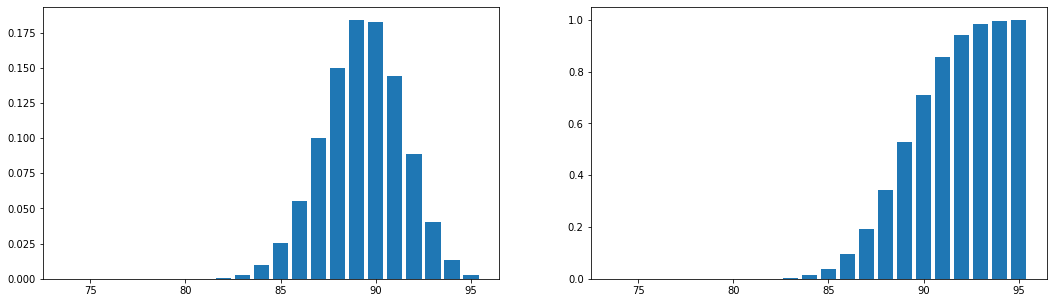

In [8]:
tester = freshmen_df.sort_values('Win_Chance', ascending = True)[:22]
test_pb = PoiBin(tester['Win_Chance'])
test_pmf = [test_pb.pmf(x) for x in range(22)]
test_cdf = [test_pb.cdf(x) for x in range(22)]
f, ax = plt.subplots(figsize=(18,5))
plt.subplot(121).bar(range(74,96),test_pmf[0:22])
plt.subplot(122).bar(range(74,96),test_cdf[0:22])

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

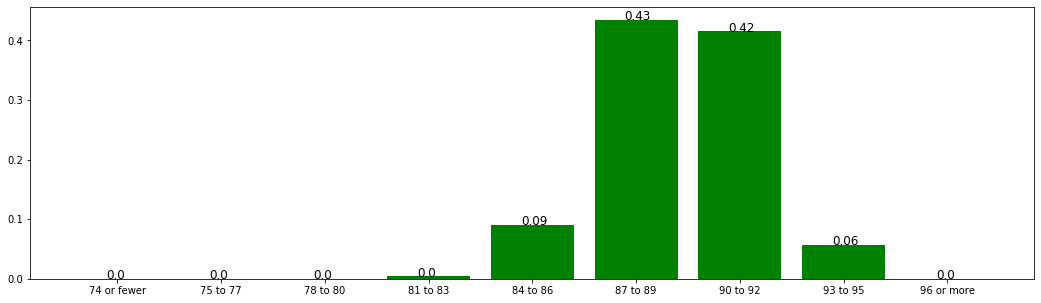

In [9]:
test_probability = {"74 or fewer":test_pb.cdf(0), "75 to 77" :test_pb.cdf(3)-test_pb.cdf(0),
           "78 to 80":test_pb.cdf(6)-test_pb.cdf(3), "81 to 83":test_pb.cdf(9)-test_pb.cdf(6),
          "84 to 86":test_pb.cdf(12)-test_pb.cdf(9), "87 to 89":test_pb.cdf(15)-test_pb.cdf(12),
          "90 to 92":test_pb.cdf(18)-test_pb.cdf(15), "93 to 95":test_pb.cdf(21)-test_pb.cdf(18),
          "96 or more":test_pb.pmf(22)}
f, ax = plt.subplots(figsize=(18,5))
for i, v in enumerate(test_probability.values()):
    ax.text(i-.11, 
              v, 
              round(v,2), 
              fontsize=12)
plt.bar(test_probability.keys(),test_probability.values(), color = 'green')
plt.bar(prices.keys(),prices.values(),color = 'red')

In [ ]:
pb = PoiBin(freshmen_df['Win_Chance'])
pmf = [pb.pmf(x) for x in range(96)]
cdf = [pb.cdf(x) for x in range(96)]

In [ ]:
f, ax = plt.subplots(figsize=(18,5))
plt.subplot(121).bar(range(74,96),pmf[74:96])
plt.subplot(122).bar(range(74,96),cdf[74:96])

In [ ]:
probability = {"74 or fewer":pb.cdf(74), "75 to 77" :pb.cdf(77)-pb.cdf(74),
           "78 to 80":pb.cdf(80)-pb.cdf(77), "81 to 83":pb.cdf(83)-pb.cdf(80),
          "84 to 86":pb.cdf(86)-pb.cdf(83), "87 to 89":pb.cdf(89)-pb.cdf(86),
          "90 to 92":pb.cdf(92)-pb.cdf(89), "93 to 95":pb.cdf(95)-pb.cdf(92),
          "96 or more":pb.pmf(96)}

In [ ]:
f, ax = plt.subplots(figsize=(18,5))
for i, v in enumerate(probability.values()):
    ax.text(i-.11, 
              v, 
              round(v,2), 
              fontsize=12)
plt.bar(probability.keys(),probability.values(), color = 'green')
plt.bar(prices.keys(),prices.values(),color = 'red')


In [ ]:
returns = {key:((1-prices[key]) * .9 + prices[key])/prices[key] for key in prices.keys()}
returns_no = {key:((1-prices_no[key]) * .9 + prices_no[key])/prices_no[key] for key in prices_no.keys()}
pop = pd.DataFrame([[key,prices[key],prices_no[key],round(probability[key],2),round(test_probability[key],2),round(returns[key],2),round(returns_no[key],2)] for key in probability.keys()],columns = ['Bucket','price_yes','price_no','prob','test_prob','return_yes','return_no'])
pop = pop.set_index('Bucket')
pop

In [ ]:
certainty = probability['84 to 86'] + probability['87 to 89'] + probability['90 to 92']
test_certainty = test_probability['84 to 86'] + test_probability['87 to 89'] + test_probability['90 to 92']
print(round(certainty,2))
print(round(test_certainty,2))